## École Polytechnique de Montréal
## Département Génie Informatique et Génie Logiciel

## INF8460 – Traitement automatique de la langue naturelle - TP1

## Objectifs d'apprentissage: 

•	Savoir accéder à un corpus, le nettoyer et effectuer divers pré-traitements sur les données
•	Savoir effectuer une classification automatique des textes pour l’analyse de sentiments
•	Evaluer l’impact des pré-traitements sur les résultats obtenus


## Équipe et contributions 
Veuillez indiquer la contribution effective de chaque membre de l'équipe en pourcentage et en indiquant les modules ou questions sur lesquelles chaque membre a travaillé


Nom Étudiant 1: Luu Thien-Kim (1834378) 33.33%

Nom Étudiant 2: Mellouk Souhaila (1835144) 33.33%

Nom Étudiant 3: Younes Mourad (1832387) 33.33%

Nous avons tous travaillé ensemble sur chaque question

## Librairies externes

In [824]:
import os
import pandas as pd
from typing import List, Literal, Tuple

## Valeurs globales

In [825]:
data_path = "data"
output_path = "output"

## Données

In [826]:
def read_data(path: str) -> Tuple[List[str], List[bool], List[Literal["M", "W"]]]:
    data = pd.read_csv(path)
    inputs = data["response_text"].tolist()
    labels = (data["sentiment"] == "Positive").tolist()
    gender = data["op_gender"].tolist()
    return inputs, labels, gender

In [827]:
train_data = read_data(os.path.join(data_path, "train.csv"))
test_data = read_data(os.path.join(data_path, "test.csv"))

train_data = ([text.lower() for text in train_data[0]], train_data[1], train_data[2])
test_data = ([text.lower() for text in test_data[0]], test_data[1], test_data[2])

In [828]:
def getSentiment(data):
    sentimentList = []
    for sentiment in data:
        if sentiment:
            sentimentList.append("Positive")
        else:
            sentimentList.append("Negative")
    return sentimentList

## 1. Pré-traitement et Exploration des données

### Lecture et prétraitement

Dans cette section, vous devez compléter la fonction preprocess_corpus qui doit être appelée sur les fichiers train.csv et test.csv. La fonction preprocess_corpus appellera les différentes fonctions créées ci-dessous. Les différents fichiers de sortie doivent se retrouver dans le répertoire output.  Chacune des sous-questions suivantes devraient être une ou plusieurs fonctions.

In [896]:
train_path = os.path.join(data_path, "train.csv")
test_path = os.path.join(data_path, "test.csv")

train_phrases_path = os.path.join(output_path, "train_phrases.csv")
test_phrases_path = os.path.join(output_path, "test_phrases.csv")

In [902]:
def lowerCases(data):
    return ([text.lower() for text in data[0]], data[1], data[2])

#### 1) Segmentez chaque corpus en phrases, et stockez-les dans un fichier `nomcorpus`_phrases.csv (une phrase par ligne)

In [903]:
import nltk
nltk.download("punkt") 
nltk.download("wordnet")
import csv

def segmentSentences(path) :
    data = lowerCases(read_data(path))
    corpus = data[0]
    sentiment = getSentiment(data[1])
    if not os.path.isdir(output_path) :
        try:
            os.mkdir(output_path)
        except OSError:
            print ("Creation of the directory %s failed" % path)
        else:
            print ("Successfully created the directory %s " % path)
    newFilePath = output_path + '/' + os.path.splitext(os.path.basename(path))[0] + "_phrases.csv"
    file = open(newFilePath, "w")
    with open(newFilePath, "w") as f: 
        f.write("response_text" + ',' + "sentiment" + ',' + "op_gender" +'\n')
        for i in range(len(corpus)) :
            sentences = nltk.sent_tokenize(corpus[i])
            for sentence in sentences:
                sentence = sentence.replace('"', '""').replace('"', '""')
                f.write('"'+ sentence +'"' + ',' + '"' +sentiment[i]+ '"'+ ',' + '"'+data[2][i] + '"\n')
                
    return newFilePath


[nltk_data] Downloading package punkt to /Users/kimluu/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/kimluu/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [904]:
segmentSentences(train_path)
segmentSentences(test_path)

'output/test_phrases.csv'

#### 2) Normalisez chaque corpus au moyen d’expressions régulières en annotant les négations avec _Neg L’annotation de la négation doit ajouter un suffixe _NEG à chaque mot qui apparait entre une négation et un signe de ponctuation qui identifie une clause. Exemple : 
No one enjoys it.  no one_NEG enjoys_NEG it_NEG .

I don’t think I will enjoy it, but I might.  i don’t think_NEG i_NEG will_NEG enjoy_NEG it_NEG, but i might.

In [832]:
def getPath(path) :
    if "train" in path :
        path = train_path
    elif "test" in path :
        path = test_path
        
    return path

In [911]:
import re

def normalize(path) :
    with open(path, "r") as f :
        data = list(f)
    
    newFilePath = output_path + '/' + os.path.splitext(os.path.basename(getPath(path)))[0] + "_negation.csv"
    file = open(newFilePath, "w")
    with open(newFilePath, "w") as f:
        for sentence in data:
            match = re.sub("(?i)(?<=not |n't | no )(.*?[,.(?!;]+)", lambda m: m.group(1).replace(" ", "_NEG ")
                           .replace(".", "_NEG.").replace(",", "_NEG,").replace("?", "_NEG?").replace("!", "_NEG!")
                           .replace("(", "_NEG(").replace(";", "_NEG;"), sentence)
            second_match = re.sub("(?<=No |NO )(.*?[,.(?!;]+)", lambda m: m.group(1).replace(" ", "_NEG ")
                           .replace(".", "_NEG.").replace(",", "_NEG,").replace("?", "_NEG?").replace("!", "_NEG!")
                           .replace("(", "_NEG(").replace(";", "_NEG;"), match)
            f.write(match)     
    return newFilePath
            

In [912]:
normalize(train_phrases_path)
normalize(test_phrases_path)

'output/test_negation.csv'

#### 3) Segmentez chaque phrase en mots (tokenisation) et stockez-les dans un fichier `nomcorpus`_mots.csv. (Une phrase par ligne, chaque token séparé par un espace, il n’est pas nécessaire de stocker la phrase non segmentée ici) ;

In [835]:
def tokenize(path) :
    sentences = []
    
    data = read_data(path)
    corpus = data[0]        
    
    sentiment = getSentiment(data[1])
    newFilePath = output_path + '/' + os.path.splitext(os.path.basename(getPath(path)))[0] + "_mots.csv"
    file = open(newFilePath, "w")
    with open(newFilePath, "w") as f: 
        f.write("response_text" + ',' + "sentiment" + ',' + "op_gender" +'\n')
        for i in range(len(corpus)) :
            listTokens = nltk.word_tokenize(corpus[i])
            tokens = ' '.join(listTokens)
            f.write('"' + tokens + '"' + ',' + '"' + sentiment[i]+ '"'+ ',' + '"' + data[2][i] + '"\n')
                
    return newFilePath

In [836]:
tokenize(train_phrases_path)
tokenize(test_phrases_path)

train_mots_path = os.path.join(output_path, "train_mots.csv")
test_mots_path = os.path.join(output_path, "test_mots.csv")

#### 4) Lemmatisez les mots et stockez les lemmes dans un fichier `nomcorpus`_lemmes.csv (une phrase par ligne, les lemmes séparés par un espace) ;

In [837]:
def lemmatize(path) :
    with open(path, "r") as f :
        data = list(f)
        
    newFilePath = output_path + '/' + os.path.splitext(os.path.basename(getPath(path)))[0] + "_lemmes.csv"
    lemmzer = nltk.WordNetLemmatizer()
    
    file = open(newFilePath, "w")
    with open(newFilePath, "w") as f: 
        for sentences in data :
            lemmes = [lemmzer.lemmatize(token) for token in sentences.split()]
            sentences = ' '.join(lemmes)
            f.write(sentences+'\n')
                
    return newFilePath

In [838]:
lemmatize(train_mots_path)
lemmatize(test_mots_path)

'output/test_lemmes.csv'

#### 5) Retrouvez la racine des mots (stemming) en utilisant nltk.PorterStemmer(). Stockez-les dans un fichier `nomcorpus`_stems.csv (une phrase par ligne, les racines séparées par une espace) ;

In [839]:
def stemmize(path) :    

    data = read_data(path)
    corpus = data[0]        
    sentiment = getSentiment(data[1])
        
    path = getPath(path)
    newFilePath = output_path + '/' + os.path.splitext(os.path.basename(path))[0] + "_stems.csv"
    
    stemmer = nltk.PorterStemmer()
    
    file = open(newFilePath, "w")
    with open(newFilePath, "w") as f:
        f.write("response_text" + ',' + "sentiment" + ',' + "op_gender" +'\n')
        for i in range(len(corpus)) :
            stems = [stemmer.stem(token) for token in corpus[i].split()]
            sentences = ' '.join(stems)
            f.write('"' + sentences + '"' + ',' + '"' + sentiment[i]+ '"'+ ',' + '"' + data[2][i] + '"\n')
                
    return newFilePath
    

In [840]:
stemmize(train_mots_path)
stemmize(test_mots_path)

'output/test_stems.csv'

#### 6) Ecrivez une fonction qui supprime les mots outils (stopwords) du corpus. Vous devez utiliser la liste de stopwords de NLTK ;

In [893]:
nltk.download("stopwords")
from nltk.corpus import stopwords
stopwords.words("english")

def deleteStopWords(path) :

    data = read_data(path)
    corpus = data[0]        
    sentiment = getSentiment(data[1])
        
    path = getPath(path)
    newFilePath = output_path + '/' + os.path.splitext(os.path.basename(path))[0] + "_stopWords.csv"
    stopwords_english = set(stopwords.words("english"))
    output = []
    
    file = open(newFilePath, "w")
    with open(newFilePath, "w") as f: 
        f.write("response_text" + ',' + "sentiment" + ',' + "op_gender" +'\n')
        for i in range(len(corpus)) :
                newSentence = [token for token in nltk.word_tokenize(corpus[i]) if token not in stopwords_english]
                sentences = ' '.join(newSentence)
                output.append(sentences)
                f.write('"' + sentences + '"' + ',' + '"' + sentiment[i]+ '"'+ ',' + '"' + data[2][i] + '"\n')
                
    return newFilePath
    

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/kimluu/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [894]:
deleteStopWords(train_mots_path)
deleteStopWords(test_mots_path)

'output/test_stopWords.csv'


#### 7) Écrivez une fonction preprocess_corpus(corpus) qui prend un corpus brut stocké dans un fichier.csv, effectue les étapes précédentes, puis stocke le résultat de ces différentes opérations dans un fichier corpus _norm.csv

In [843]:
from shutil import copyfile

def preprocess_corpus(input_file: str, output_file: str) :
    data = read_data(input_file)
    results = deleteStopWords(stemmize(lemmatize(tokenize(normalize(segmentSentences(input_file))))))
#     data = read_data(results)
#     corpus = data[0]        
#     sentiment = getSentiment(data[1])
    copyfile(results, output_file)
    
    
#     print(results)
#     file = open(output_file, "w")
#     with open(output_file, "w") as f:
#         f.write("response_text" + ',' + "sentiment" + ',' + "op_gender" +'\n')
#         for element in results :
#             r = element.replace('"', '""').replace('"', '')
#             f.write('"' + r + '"\n')
            
    

In [844]:
preprocess_corpus(
   os.path.join(data_path, "train.csv"), os.path.join(output_path, "train_norm.csv")
)
preprocess_corpus(
   os.path.join(data_path, "test.csv"), os.path.join(output_path, "test_norm.csv")
)

response_text,sentiment,op_gender

"I don't think_NEG any_NEG one_NEG there_NEG has_NEG EBOLA_NEG Bob_NEG Latta_NEG You_NEG should_NEG be_NEG back_NEG in_NEG Washington_NEG actually_NEG getting_NEG something_NEG done_NEG there_NEG on_NEG the_NEG House_NEG floor_NEG.","Negative","M"

";-)...anything other than jeans and t-shirts are superfluous, by the way.","Negative","M"

"'Update your wardrobe'...pfft.","Negative","M"

"Meh, I could only get to 8.","Negative","M"

"Need to work up.","Negative","M"

"A bill consisting of a single sentence.","Positive","M"

"Very well done, sir.","Positive","M"

"So far, so good.","Positive","W"

"Thx !","Positive","W"

"My buddy Jeff Johnson was your prop master on that.","Positive","W"

"she had me at everlasting youth.","Positive","W"

"Congratulations to you for a well deserved recognition!","Positive","M"

"baffoon, idiot, dumb.","Negative","W"

"The intelegent conversation continues.......","Negative","W"

"They don't deserve_NEG that_NEG honour_

"I am in!!!","Positive","W"

"I think I might die alittle !!!","Positive","W"

"!","Positive","W"

"What lobby group told you to do this?","Negative","M"

"Oh, please.","Negative","M"

"This guy is not presidential_NEG material_NEG.","Negative","M"

"Have you heard some of the crazy things he has said over the last few months?","Negative","M"

"Who convinced him he was ready to leave his brilliant medical career behind for politics?","Negative","M"

"I am so glad we have women scientists.","Negative","W"

"Thank you, thank you, thank you, thank you thank you thank you!","Negative","M"

"!","Negative","M"

"So proud to call you my congresswoman!","Positive","W"

"Nothing.","Negative","W"

"Were a pathetic, boring group of people, and honestly that reality has made me pretty bitter.","Negative","W"

"IDK whats the wage at your local McDonalds but Im pretty sure you can afford 2 wings and some packs from 1 week of work.","Negative","M"

"a really touching triumpal story.","Positive","M"




"Time to end the Prussian Educational caste system and return control to local districts with school choice.","Negative","W"

"Competition is the only thing that will save our kids from this Pavlovian conditioning.","Negative","W"

"Thank you for the follow too!","Positive","M"

"Good luck with your workouts:))","Positive","M"

"Don t use Michelle Obama's school lunch program from what I have read most of it gets thrown in the garbage.","Negative","M"

"Expansions are severely worse than classic packs so far though, Id discourage anyone buying GvG or BRM before having atleast basic collection of classics.","Negative","W"

"Naxx is just too good though.","Negative","W"

"So far has tgt been underwhelming too.","Negative","W"

"Well except for lock n load.","Negative","W"

"I was able to relate to what was said because I do in fact feel this """"powerfulness"""" after my Yoga classes.","Positive","W"

"This may have to do with the asanas, which are yoga postures that have the same """"o

"Something like that should be permanent","Positive","M"

"You know that's right Pumpkin!","Positive","W"

"An FAQ on a Government Shutdown can be found here: http://goo.gl/z1X0k","Negative","W"

"Thanks!","Positive","W"

"It's that time of year :).","Positive","W"

"I love seeing all your butter updates...","Positive","W"

"You already known we are watching """"Uncle Mac""""!","Positive","M"

"!","Positive","M"

"Thanks for all you do for us JP.","Positive","M"

"I am comforted just knowing you are in DC looking out for us!","Positive","M"

"Keep up the great work and congrats!","Positive","M"

"Ayuda para este pueblo por favor!,,","Positive","W"

"Happy international women's day to you too Bitsie.","Positive","W"

"[[PHOTO]]","Positive","W"

"Hi darling.","Positive","W"

"welcome to Fitocracy.","Positive","W"

"wish you a great time here.","Positive","W"

"Simple, because he has let himself become a tool of the Tea Party.","Negative","W"

"A real leader would tell his party's extremi


"Who says Brexiteers are all deluded self regarding aggressive nutjobs?","Negative","M"

"Adam: That """"fundamental inexplicable"""" is the object of cosmology (well, and metaphysics & religion...).","Positive","M"

"I'd suggest you to have a closer look at it.","Positive","M"

"Cheers!","Positive","M"

"Shalom, Hope is Always Alive, it some times jus cant see the results jus Yet, most times anyway :)) Good Talk Trita, lets Hope other's back home with U feel the same, still.","Positive","M"

"You have a legitimate excuse Mark.","Negative","M"

"its too much, thats where the whole skit starts to sound stupid","Negative","W"

"If Gordon Brown has a global ethic, then why did he and much of the world condemn getting rid of Saddam Hussein?","Negative","M"

"Ok... Heather Knight has become my hero.","Positive","W"

"Very smart, beautiful, creative, stylish, and she builds robots.","Positive","W"

"She should be every little girls role model.","Positive","W"

"Right on.","Positive","M"

"B

"I always had some ideas, but I've never read or seen someone talk about this straight-up before.","Positive","W"

"Evolution based on geographical UV exposure, plain and simple.","Positive","W"

"Good Ad...but her voice is delayed....like a Chinese Kung Fu movie","Negative","W"

"Awesome!","Positive","W"

"And thanks for all the props!","Positive","W"

"But yet they cry about the poor paying their fair share","Negative","M"

"Congresswoman, thank you for serving on the Armed Services committee.","Positive","W"

"I'm a Republican constituent who appreciates your service and representation.","Positive","W"

"And you might be a Dipper.","Negative","M"

"Took me by surprise Rich.","Positive","M"

"Thank you, I like it too x","Positive","M"

"Plus he may *speak* English poorly but write well.","Negative","M"

"Its usually easier to learn to read and write another language than to learn to speak it.","Negative","M"

"Or maybe OP is just great at English, which is also likely.","Negative","M


"look great, I love it :D","Positive","W"

"You're very welcome sir.","Positive","M"

"Thanks so much.","Positive","W"

"He was very happy with how Christmas went down lol.","Positive","W"

"He is such a little ham!","Positive","W"

"You're definitely putting in the hard work consistently.","Positive","W"

"Keep it up :)","Positive","W"

"But you do not show_NEG, just a picture of you.","Negative","W"

"Yep.","Positive","M"

"But I think this is still whimsical and interesting.","Positive","M"

"It wouldnt be that helpful, it would just be cool.","Positive","M"

"This was such a nice talk.","Positive","W"

"I think we need to learn to be emotionally correct in many different ways.","Positive","W"

"Always think about what you are going to say or do - is it going to hurt anybody's feelings?","Positive","W"

"If everyone began by thinking that way we would all be more tolerant of each other.","Positive","W"

"It's not that_NEG hard_NEG.","Positive","W"

"Thats a handy memory aid","Posit

"Ridgeland is very proud if you!","Positive","W"

"Likewise, it's a pleasure : )","Positive","W"

"Now just cut Bannon out and you will be my hero","Positive","M"

"Gee, where are all the job the Republicans promised as we now head into March?","Negative","M"

"good luck!","Positive","M"

"We will miss you!","Positive","M"

"God bless you and your family.","Positive","W"

"i want to thank you mrs waters for all your hard work.","Positive","W"

"i'm so glad that michelle bachman bombed in iowa !","Positive","W"

"I found the talk vague.","Negative","M"

"Similar to saying we should have an economy that operates less on greed.","Negative","M"

"Yes but it's built into the dynamic of the system so does he have any ideas on how make a significant systemic change?","Negative","M"

"I didn't hear_NEG it_NEG.","Negative","M"

"This was wonderful!","Positive","W"

"What an inspiring woman!","Positive","W"

"Rivalries be damned, he is fine as HELL","Positive","W"

"Honestly, I prefer your versi


"Congratulations Congressman Lankford!","Positive","M"

"Thank you for your Outstanding Support of our Men and Women in the Military.","Positive","M"

"Remember Ty Woods and Benghazi during the next Session .","Positive","M"

".","Positive","M"

".","Positive","M"

"Thank You Sir.","Positive","M"

"grool art.it would be useful it you make art which peels onion skin and dice it .","Positive","M"

"Hi!","Positive","W"

"Thanks for the props, and always glad to meet another Sherlockian!","Positive","W"

"yes my sweetie they are perfect and you make them shine in many ways","Positive","W"

"Your dimples make me happy.","Positive","W"

"Just swinging it into things all over the place like he dont give a fuck.","Negative","W"

"Tables.","Negative","W"

"Chairs.","Negative","W"

"Chandeliers.","Negative","W"

"Small horses.","Negative","W"

"Austrian women.","Negative","W"

"Yep!","Positive","M"

"Calais atm, home by lunchtime hopefully!","Positive","M"

"Are you going up to Newby Hall today

"Lol.","Negative","W"

"When they don't belong_NEG in_NEG your_NEG life_NEG, they just don't belong_NEG.","Negative","W"

"Hahaha, no problem_NEG!","Positive","W"

"And thank you!","Positive","W"

"I've been looking for a website like this for ages~","Positive","W"

"Im assuming its *something intimate*?","Positive","W"

"I see no problem_NEG about_NEG it_NEG.","Positive","W"

"Definitely go for it.","Positive","W"

"My Yorkie loves an occasional Almond, Cashew, Pecan, or Brazil Nut .... or 2, or 3 or 4 ....","Positive","M"

"Because it was reported that he chose not to_NEG trade_NEG PG_NEG to_NEG the_NEG East_NEG out_NEG of_NEG spite_NEG.","Negative","M"

"Couple that with the absolutely shit return he got, and its not hard_NEG for_NEG people_NEG to_NEG knee_NEG jerk_NEG call_NEG him_NEG dumb_NEG because_NEG that_NEG trade_NEG was_NEG dumb_NEG.","Negative","M"

"Enjoyed your story Alex.","Positive","M"

"Happy to see that all of your hard work has paid and will keep paying off.","Posi


"Looking forward to casting my vote for Seth tomorrow!","Positive","M"

"Thank you so much :D","Positive","M"

"I've always wondered who was the genius that came up with the open plan office....","Negative","M"

"brilliant.","Positive","M"

"and the name of the product is spot on!","Positive","M"

"This poem was read to me and the people who were in training with me when I was hired at JCPenney :).","Negative","W"

"TO THE CRAZY ONES!","Negative","W"

"Julia Sweeney eloquently captures the delusions of theists through her funny stories.","Positive","W"

"Hopefully one day this will be watched by an audience who no longer_NEG have_NEG to_NEG deal_NEG with_NEG knocks_NEG on_NEG the_NEG door_NEG from_NEG kindly_NEG young_NEG men_NEG with_NEG their_NEG fictions_NEG.","Positive","W"

"A great presentation.","Positive","W"

"Let go of god, hold out for the secular.","Positive","W"

"Howard, it REALLY seems to get under your skin when the GOP is called out for being exactly what it is, doesn


"bkb is absolutely core lategame on medusa.","Negative","W"

"If she not getting_NEG it_NEG, she becomes useless being stunned-hexed-disarmed.","Negative","W"

"And she have no mobility_NEG, kiting her having 2 halberds is quite easy.","Negative","W"

"Duh...ya think...UNBELIEVABLE!","Negative","M"

"We really need more of those!","Positive","W"

":)","Positive","W"

"Have safe and good trip!","Positive","M"

"I voted this morning, colored in the circle beside your name, as I have been since I was 18 (I'm 40).","Positive","M"

"My only wish ...","Positive","M"

"It was for Governor!","Positive","M"

"That was truly amazing and specially natasha was a rather intelligent child,might have helped her cope with stuff,makes you wonder what is the source of confidence for children like her,","Positive","M"

"i was inspired to get out of the rut.","Positive","W"

"http://blackopscharlie.com/2012/03/02/poem-livin-large/","Positive","W"

"this is good news, now I am going to go find lisapayne",

### Exploration des données

#### 1)

Complétez les fonctions retournant les informations suivantes (une fonction par information, chaque fonction prenant en argument un corpus composé d'une liste de phrases segmentées en tokens(tokenization)) ou une liste de genres et une liste de sentiments:

In [845]:
corpus = [['soso.', 'kim a acheté un mbp13 silver!', 'mourad a acheté un mbp16 spacegrey']]
corpus = [['soso', 'a', 'acheté', 'un', 'mbp16', 'silver', '.', 'Je', 'ne', 'suis', 'pas', 'daccord!'],
          ['kim', 'a', 'acheté', 'un', 'mpb13', 'silver','.'], 
          ['mourad', 'a', 'acheté', 'un', 'mbp16', 'spacegrey', '.', 'Quil', 'aime', 'beaucoup']]
corpus = [["I", "do", "not", "agree_NEG", "with_NEG", "this_NEG!", "I", "prefer", "the", "other", "option"],
           ["I", "really", "like", "that", "new", "mbp16", "Mourad", "made", "a", "good", "choice"],
           ["I", "don't", "think_NEG", "that_NEG.", "I", "prefer", "the", "mbp13"]]

In [846]:
#Return if the corpus is tokenized or not
def isTokenized(corpus) :
    for sentences in corpus :
        for sentence in corpus :
            for l in sentence :
                if ' ' in l :
                    return 0
    return 1

In [847]:
#Return the corpus as a list of documents, that are not tokenizated, but segmented in sentences
def getListOfSentences(corpus):
    listOfDocs = []
    listOfTokens = []
    if isTokenized(corpus) :
        for sentences in corpus :
            for token in sentences :
                listOfTokens.append(token)
            s = ' '.join(listOfTokens)
            s = nltk.sent_tokenize(s)
            listOfDocs.append(s)
            listOfTokens = []
    return listOfDocs

In [848]:
getListOfSentences(corpus)

[['I do not agree_NEG with_NEG this_NEG!', 'I prefer the other option'],
 ['I really like that new mbp16 Mourad made a good choice'],
 ["I don't think_NEG that_NEG.", 'I prefer the mbp13']]

##### a. Le nombre total de tokens (mots non distincts)

In [849]:
def getNumberOfTokens(corpus):
    corpus = getListOfSentences(corpus)
    count = 0
    for sentences in corpus :
        for sentence in sentences :
            count = count + len(nltk.word_tokenize(sentence))
    return count

In [850]:
getNumberOfTokens(corpus)

33

##### b. Le nombre total de types

In [851]:
def getNumberOfTypes(corpus):
    corpus = getListOfSentences(corpus)
    listOfTokens = []
    for sentences in corpus :
        for sentence in sentences :
            tokenList = nltk.word_tokenize(sentence)
            for token in tokenList :
                listOfTokens.append(token)
    listOfTypes = list(dict.fromkeys(listOfTokens))  
    return len(listOfTypes)

In [852]:
getNumberOfTypes(corpus)

26

##### c. Le nombre total de phrases avec négation

In [853]:
def getNumberOfNeg(corpus) :
    corpus = getListOfSentences(corpus)
    numberOfNegativeSentences = 0;
    for sentences in corpus:
        for sentence in sentences:
            if "_NEG" in sentence:
                numberOfNegativeSentences = numberOfNegativeSentences + 1
    return numberOfNegativeSentences

In [854]:
getNumberOfNeg(corpus)

2

##### d. Le ratio token/type

In [855]:
def getRatioTokenType(corpus):
    return float(getNumberOfTokens(corpus)/getNumberOfTypes(corpus))

In [856]:
getRatioTokenType(corpus)

1.2692307692307692

##### e. Le nombre total de lemmes distincts

In [857]:
import nltk
def getLemmesNumber(corpus):
    corpus = getListOfSentences(corpus)
    lemmzer = nltk.WordNetLemmatizer()
    lemmesList = []
    for sentences in corpus :
        for sentence in sentences :
            lemmes = [lemmzer.lemmatize(token) for token in sentence.split()]
            for lemme in lemmes :  
                lemmesList.append(lemme)
    
    lemmesList = list(dict.fromkeys(lemmesList))   
    return len(lemmesList)

In [858]:
getLemmesNumber(corpus)

24

##### f. Le nombre total de racines (stems) distinctes

In [859]:
import nltk
def getStemsNumber(corpus):
    corpus = getListOfSentences(corpus)
    stemmer = nltk.PorterStemmer()
    stemsList = []
    for sentences in corpus :
        for sentence in sentences :
            stems = [stemmer.stem(token) for token in sentence.split()]
            for stem in stems :
                stemsList.append(stem)
    stemsList = list(dict.fromkeys(stemsList))     
    return len(stemsList)

In [860]:
getStemsNumber(corpus)

24

##### g. Le nombre total de documents (par classe)

In [861]:
def getNumberOfDocPerClass(sentiments):
    countPositive = 0
    countNegative = 0
    for sentiment in sentiments : 
        if sentiment : #positif
            countPositive = countPositive + 1
        else : #negatif
            countNegative = countNegative + 1
    return countPositive, countNegative
        
        

In [862]:
semtiments = [0,
          0,
          0,
          0,
          0, #5 negatif
          1,
          1,
          1,
          1,
          1,
          1] #6 positif

getNumberOfDocPerClass(semtiments)

(6, 5)

##### h. Le nombre total de phrases (par classe)

In [863]:
def getNumberOfSentencesPerClass(corpus, sentiments) :
    corpus = getListOfSentences(corpus)
    countSentencesPositives = 0
    countSentencesNegatives = 0
    for i in range(len(corpus)):
        if sentiments[i] : #positive
            countSentencesPositives = countSentencesPositives + len(corpus[i])
        else : #negative
            countSentencesNegatives = countSentencesNegatives + len(corpus[i])          
    return countSentencesPositives, countSentencesNegatives   

In [864]:
sentiments = [0,1,1]
getNumberOfSentencesPerClass(corpus, sentiments)

(3, 2)

##### i. Le nombre total de phrases avec négation (par classe)

In [865]:
def getNumberOfNegativeSentences(corpus, sentiments) :
    corpus = getListOfSentences(corpus)
    countNegativeSentencesPositives = 0
    countNegativeSentencesNegatives = 0
    i = 0;
    for sentences in corpus:
        for sentence in sentences:
            if sentiments[i]: #positive
                if "_NEG" in sentence:
                    countNegativeSentencesPositives = countNegativeSentencesPositives + 1
            else: #negative
                if "_NEG" in sentence:
                    countNegativeSentencesNegatives = countNegativeSentencesNegatives + 1
            i = i + 1
    return countNegativeSentencesPositives, countNegativeSentencesNegatives

In [866]:
sentiments = [0,1,1,1,1]
getNumberOfNegativeSentences(corpus, sentiments)

(1, 1)

##### j. Le pourcentage de réponses positives par genre de la personne à qui cette réponse est faite (op_gender)

In [867]:
genders = [['M', 'M', 'W', 'W', 'M', 'M', 'W', 'W', 'M', 'M', 'W', 'W']]
sentiments = [1 , 0, 1, 0, 1 , 0, 1,
             0, 0, 1,  0, 0]

In [868]:
def getPourcentageOfPositiveReponsesPerGender(genders, sentiments):
    countPosM = countPosW = 0
    iterator = 0
    totalResponse = len(sentiments)
  
    for sentiment in sentiments:
        if sentiment :
            if genders[0][iterator] == 'M':
                countPosM = countPosM + 1
            elif genders[0][iterator] == 'W':
                countPosW = countPosW + 1
        iterator = iterator + 1
  
    pourcentageW = float(countPosW / totalResponse) * 100
    pourcentageM = float(countPosM / totalResponse) * 100
  
    return(pourcentageM,pourcentageW)       

In [869]:
getPourcentageOfPositiveReponsesPerGender(genders, sentiments)

(25.0, 16.666666666666664)

#### 2) Écrivez la fonction explore(corpus, sentiments, genders) qui calcule et affiche toutes ces informations, précédées d'une légende reprenant l’énoncé de chaque question (a,b, ….j).

In [870]:
def explore(
    corpus: List[List[str]], sentiments: List[bool], genders: List[Literal["M", "W"]]
) -> None:
    print("Le nombre total de tokens (mots non distincts) : " + getNumberOfTokens(corpus) + "\n")
    print("Le nombre total de types : " + getNumberOfTypes(corpus) + "\n")
    print("Le nombre total de phrases avec négation : " + getNumberOfNeg(corpus)  + "\n")
    print("Le ratio token/type : " + getRatioTokenType(corpus) + "\n")
    print("Le nombre total de lemmes distincts : " + getLemmesNumber(corpus) + "\n")
    print("Le nombre total de racines (stems) distinctes : " + getStemsNumber(corpus) + "\n")
    print("Le nombre total de documents (par classe) : " + getNumberOfDocPerClass(semtiments) + "\n")
    print("Le nombre total de phrases (par classe) : " + getNumberOfSentencesPerClass(corpus, sentiments) + "\n")
    print("Le nombre total de phrases avec négation (par classe) : " + getNumberOfNegativeSentences(corpus, sentiments)  + "\n")
    print("Le pourcentage de réponses positives par genre de la personne à qui cette réponse est faite (op_gender) : " 
          + getPourcentageOfPositiveReponsesPerGender(sentiments, genders)  + "\n")

    

#### 3) Calculer une table de fréquence (lemme, rang (le mot le plus fréquent a le rang 1 etc.) ; fréquence (le nombre de fois où il a été vu dans le corpus).  Seuls les N mots les plus fréquents du vocabulaire (N est un paramètre) doivent être gardés. Vous devez stocker les 1000 premières lignes de cette table dans un fichier nommé table_freq.csv

In [871]:
def calculateFrequences(corpus) :
   
    corpus = getListOfSentences(corpus)
    lemmzer = nltk.WordNetLemmatizer()
    lemmesList = []
    sorted_dict = {}
   
    newFilePath = output_path + '/' + " table_freq.csv"
    file = open(newFilePath, "w")
    
    for sentences in corpus :
        for sentence in sentences :
            lemmes = [lemmzer.lemmatize(token) for token in sentence.split()]
            for lemme in lemmes :
                lemmesList.append(lemme)
               
    for word in lemmesList:
        if word not in sorted_dict:
            sorted_dict[word] = 0
        sorted_dict[word] += 1
    words = sorted_dict.items()
    sorted_lemme = sorted(words, key= lambda kv: kv[1], reverse=True)
    
    if(len(sorted_lemme) >= 1000) :
        sorted_lemme = (sorted_lemme[:1000])
    
    with open(newFilePath, "w") as f: 
        f.write("word" + ',' + "freq" + '\n')
        for i in range(0, len(sorted_lemme)):
            f.write('"' + sorted_lemme[i][0] + '"' + ',' + '"' + str(sorted_lemme[i][1]) + '"\n')
            
    return file

In [872]:
calculateFrequences(corpus)

<_io.TextIOWrapper name='output/ table_freq.csv' mode='w' encoding='UTF-8'>

## 2. Classification automatique

### a) Classification  automatique avec un modèle sac de mots (unigrammes), Naive Bayes et la régression logistique

En utilisant la librairie scikitLearn et l’algorithme Multinomial Naive Bayes et Logistic Regression, effectuez la classification des textes avec un modèle sac de mots unigramme pondéré avec TF-IDF.  Vous devez entrainer chaque modèle sur l’ensemble d’entrainement et le construire à partir de votre fichier corpus_train.csv. 

Construisez et sauvegardez votre modèle sac de mots avec les données d’entrainement en testant les pré-traitements suivants (séparément et en combinaison): tokenisation, lemmatisation, stemming, normalisation des négations, et suppression des mots outils. Vous ne devez garder que la combinaison d’opérations qui vous donne les meilleures performances sur le corpus de test. Indiquez dans un commentaire les pré-traitements qui vous amènent à votre meilleure performance (voir la section 3 – évaluation). Il est possible que la combinaison optimale ne soit pas la même selon que vous utilisiez la régression logistique ou Naive Bayes. On s’attend à avoir deux modèles optimaux, un pour Naive Bayes, et un avec régression logistique.

In [873]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

In [874]:
def getDataSet(train_csv, test_csv):
    trainPath = os.path.join(output_path, train_csv)
    testPath = os.path.join(output_path, test_csv)
    
    trainData = read_data(trainPath)
    testData = read_data(testPath)
    
    return trainData,testData

In [875]:
training_data, testing_data = getDataSet("train_phrases.csv", "test_phrases.csv" )

### Naive Bayes

In [876]:
def naiveBayes(train_data, test_data):
    vectorizer = TfidfVectorizer()    
    vectors = vectorizer.fit_transform(train_data[0])
    clf = MultinomialNB(alpha=0.5)
    clf.fit(vectors, train_data[1])
    
    vectors_test = vectorizer.transform(test_data[0])
    y_pred = clf.predict(vectors_test)
    return y_pred

In [877]:
training_data, testing_data = getDataSet("train_phrases.csv", "test_phrases.csv" )
y_pred_bayes = naiveBayes(training_data, testing_data)
print(classification_report(testing_data[1], y_pred_bayes, digits=5))

              precision    recall  f1-score   support

       False    0.83108   0.24502   0.37846       502
        True    0.80712   0.98448   0.88702      1611

    accuracy                        0.80880      2113
   macro avg    0.81910   0.61475   0.63274      2113
weighted avg    0.81282   0.80880   0.76620      2113



### Régression Logistique

In [878]:
def logisticsRegression(train_data, test_data, regParamC):
    vectorizer = TfidfVectorizer()
    vectors = vectorizer.fit_transform(train_data[0])
    model = LogisticRegression(C=regParamC)
    model.fit(vectors, train_data[1])
    
    vectors_test = vectorizer.transform(test_data[0])
    y_pred = model.predict(vectors_test)
    return y_pred

In [879]:
training_data, testing_data = getDataSet("train_phrases.csv", "test_phrases.csv" )
y_pred_bayes = logisticsRegression(training_data, testing_data, 1.0 )
print(classification_report(testing_data[1], y_pred_bayes, digits=5))

              precision    recall  f1-score   support

       False    0.72289   0.35857   0.47936       502
        True    0.82725   0.95717   0.88748      1611

    accuracy                        0.81496      2113
   macro avg    0.77507   0.65787   0.68342      2113
weighted avg    0.80246   0.81496   0.79052      2113



/Applications/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


###  b) Autre représentation pour l’analyse de sentiments et classification automatique

On vous propose maintenant d’utiliser une nouvelle représentation de chaque document à classifier.
Vous devez créer à partir de votre corpus la table suivante :

| Vocabulaire | Freq-positive | Freq-négative |
|-------------|---------------|---------------|
| happy | 10 | 1 |
| ... | ... | ... |

Où :

• Vocabulaire représente tous les types (mots uniques) de votre corpus d’entrainement

• Freq-positive : représente la somme des fréquences du mot dans tous les documents de la classe positive

• Freq-négative : représente la somme des fréquences du mot dans tous les documents de la classe négative

Notez qu’en Python, vous pouvez créer un dictionnaire associant à tout (mot, classe) une fréquence.
Ensuite il vous suffit de représenter chaque document par un vecteur à 3 dimensions dont le premier élément représente un biais (initialisé à 1), le deuxième élément représente la somme des fréquences positives (freq-pos) de tous les mots uniques (types) du document et enfin le troisième élément représente la somme des fréquences négative (freq-neg) de tous les mots uniques du document. 

En utilisant cette représentation ainsi que les pré-traitements suggérés, trouvez le meilleur modèle possible en testant la régression logistique et Naive Bayes. Vous ne devez fournir que le code de votre meilleur modèle dans votre notebook.

In [880]:
import pandas as pd

def getTableOfFrequencies(corpus) :
    dictionnary = {}
    listOfTokens = []
    data = []

    for i in range(len(corpus[0])) :
        tokenList = nltk.word_tokenize(corpus[0][i])
        for token in tokenList :
            listOfTokens.append(token)
            key = (token, corpus[1][i])
            if key in dictionnary : #if the key already exists in dic, increment frequency
                dictionnary[key] = dictionnary[key] + 1
            else : #if not, create key and initiate frequency to 1
                dictionnary.update({key : 1})
        listOfTokens = list(dict.fromkeys(listOfTokens)) #list of distinct tokens

    for token in listOfTokens :
        freq_pos = 0
        freq_neg = 0
        if (token, True) not in dictionnary and (token, False) not in dictionnary :
            freq_pos = 0
            freq_neg = 0
        elif (token, True) in dictionnary and (token, False) in dictionnary :
            freq_pos = dictionnary[token, True]
            freq_neg = dictionnary[token, False]
        elif (token, True) in dictionnary and (token, False) not in dictionnary :
            freq_pos = dictionnary[token, True]
            freq_neg = 0
        elif (token, True) not in dictionnary and (token, False) in dictionnary :
            freq_neg = dictionnary[token, False]
            freq_pos = 0   
        data.append([token, freq_pos, freq_neg])    

    return pd.DataFrame(data, columns=["Vocabulaire", "Freq-positive", "Freq-négative"])

In [881]:
getTableOfFrequencies(test_data)

,Vocabulaire,Freq-positive,Freq-négative
0,thanks,95,2
1,back,42,6
2,!,776,105
3,yep,1,0
4,",",355,176
...,...,...,...
3963,msnbc,1,0
3964,tingles,1,0
3965,ship,1,0
3966,fiber,1,0


## 3. Évaluation et discussion

#### a) Pour déterminer la performance de vos modèles, vous devez tester vos modèles de classification sur l’ensemble de test et générer vos résultats pour chaque modèle dans une table avec les métriques suivantes : Accuracy et pour chaque classe, la précision, le rappel et le F1 score. On doit voir cette table générée dans votre notebook avec la liste de vos modèles de la section 2 et leurs performances respectives. 

In [882]:
y_pred_bayes = naiveBayes(training_data, testing_data)
print(classification_report(testing_data[1], y_pred_bayes))

              precision    recall  f1-score   support

       False       0.83      0.25      0.38       502
        True       0.81      0.98      0.89      1611

    accuracy                           0.81      2113
   macro avg       0.82      0.61      0.63      2113
weighted avg       0.81      0.81      0.77      2113



In [883]:
y_pred_regression = logisticsRegression(training_data, testing_data,1.0)
print(classification_report(testing_data[1], y_pred_regression))

              precision    recall  f1-score   support

       False       0.72      0.36      0.48       502
        True       0.83      0.96      0.89      1611

    accuracy                           0.81      2113
   macro avg       0.78      0.66      0.68      2113
weighted avg       0.80      0.81      0.79      2113



/Applications/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


#### b) Générez un graphique qui représente la performance moyenne (mean accuracy – 10 Fold cross-validation) de vos différents modèles par tranches de 500 textes sur l’ensemble d’entrainement.

In [884]:
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
import matplotlib.pyplot as plt 

In [885]:
def chooseClassification(models):
    vec = TfidfVectorizer().fit_transform(train_data[0])
    if models == 'LR' :   
        model = LogisticRegression(C=1.0)
        model.fit(vec, train_data[1])
    if models == 'NB' :    
        model = MultinomialNB(alpha=0.5)
        model.fit(vec, train_data[1])
    return model

In [886]:
def applyFoldCrossValidation(model, X_train, Y_train):
    KFold = RepeatedKFold(n_splits=10)
    accuracies = cross_val_score(model, X_train, Y_train,cv=KFold)
    return accuracies

In [887]:
X_abs = []
Maccuracies_LogisticRegression = []
Maccuracies_NaiveBayes = []

def findMeanAccuracy():
    accuracy_LogisticRegression = []
    accuracy_NaiveBayes = []
    k = 0
    
    vec = TfidfVectorizer()

    for i in range(0, int(len (train_data[0]) / 500)):
        train = train_data[0][0+k : 500 +k]
        test = train_data[1][0+k : 500 +k]
        
        vecTransformation = vec.fit_transform(train)
        X_training, X_testing, Y_training, Y_testing = train_test_split(vecTransformation, test)
        
        accuracy_LogisticRegression = applyFoldCrossValidation(chooseClassification('LR'),X_training,Y_training)
        accuracy_NaiveBayes = applyFoldCrossValidation(chooseClassification('NB'),X_training,Y_training)
        Maccuracies_LogisticRegression.append(accuracy_LogisticRegression.mean())
        Maccuracies_NaiveBayes.append(accuracy_NaiveBayes.mean())
        X_abs.append(k)
        k = k+ 500

In [888]:
findMeanAccuracy()

In [889]:
def GenerateMeanAccuranciesGraph():
    plt.figure(figsize=(40, 20))
    plt.suptitle('Graphique de la performance moyenne', fontsize=40, fontweight='bold')
    plt.plot(X_abs, Maccuracies_LogisticRegression)
    plt.plot(X_abs, Maccuracies_NaiveBayes)
    plt.xticks(X_abs, fontsize=25)
    plt.yticks( fontsize=25)
    plt.legend(["Logistic Regression", "Naive Bayes"], fontsize=40)
    plt.show()

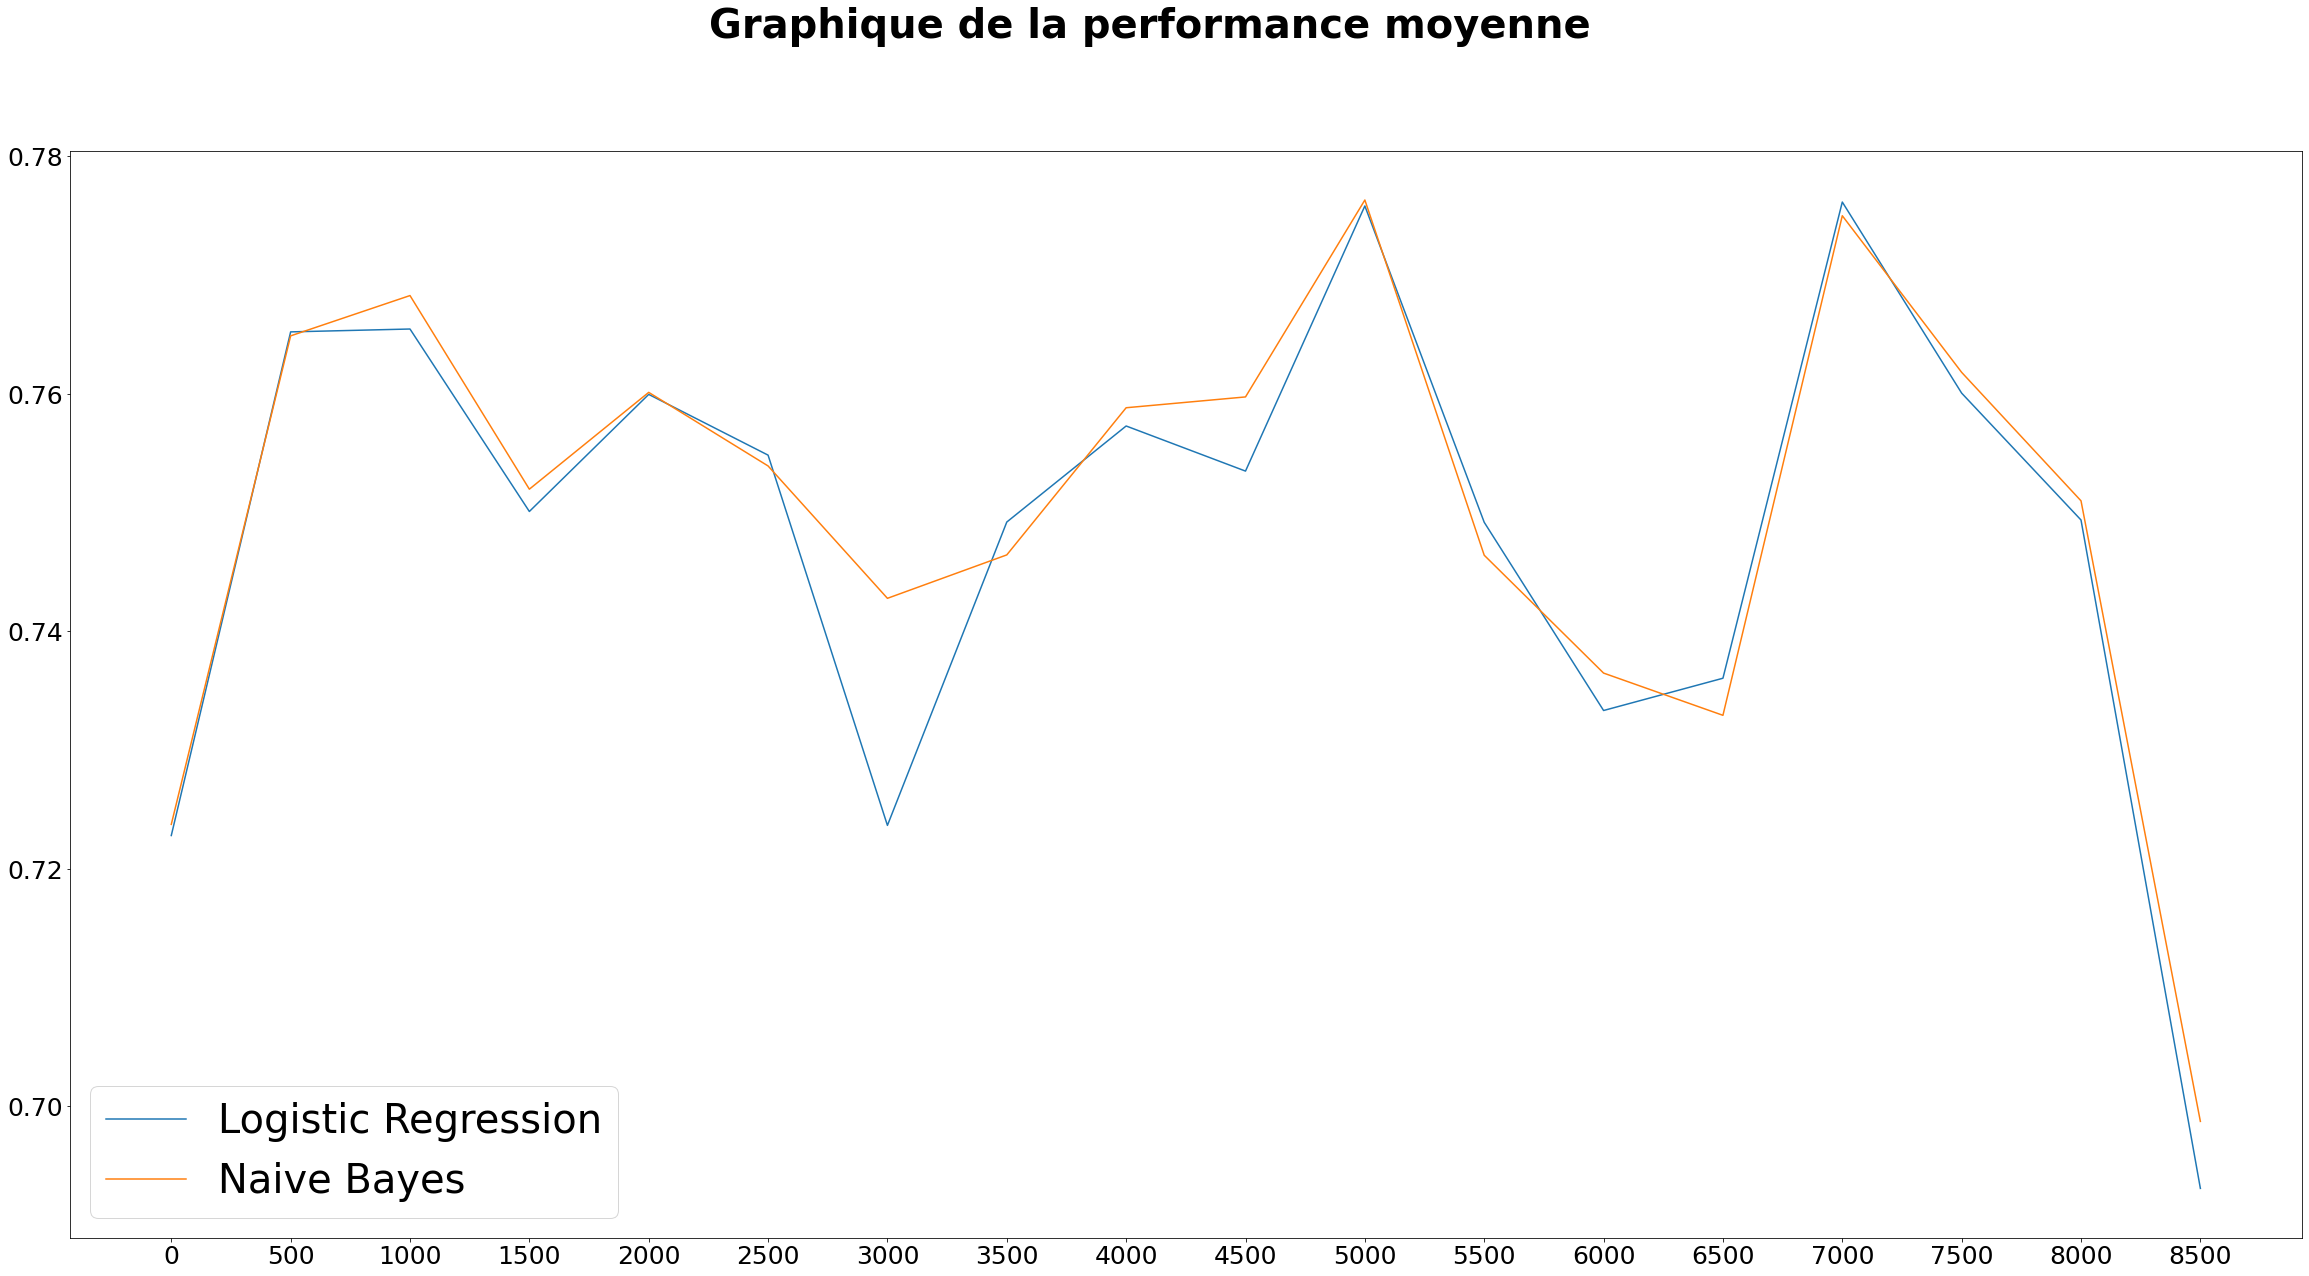

In [890]:
GenerateMeanAccuranciesGraph()

#### c) Que se passe-t-il lorsque le paramètre de régularisation de la régression logisque (C) est augmenté ?

In [891]:
print("For C = 1.0")
y_pred_regression = logisticsRegression(train_data, test_data,1.0)
print(classification_report(test_data[1], y_pred_regression) + "\n")

print("For C = 2.0")
y_pred_regression = logisticsRegression(train_data, test_data,2.0)
print(classification_report(test_data[1], y_pred_regression) + "\n")

print("For C = 5.0")
y_pred_regression = logisticsRegression(train_data, test_data,5.0)
print(classification_report(test_data[1], y_pred_regression))


For C = 1.0
              precision    recall  f1-score   support

       False       0.80      0.53      0.64       254
        True       0.86      0.95      0.90       751

    accuracy                           0.85      1005
   macro avg       0.83      0.74      0.77      1005
weighted avg       0.84      0.85      0.84      1005


For C = 2.0
              precision    recall  f1-score   support

       False       0.77      0.55      0.64       254
        True       0.86      0.95      0.90       751

    accuracy                           0.85      1005
   macro avg       0.82      0.75      0.77      1005
weighted avg       0.84      0.85      0.84      1005


For C = 5.0
              precision    recall  f1-score   support

       False       0.75      0.60      0.67       254
        True       0.87      0.93      0.90       751

    accuracy                           0.85      1005
   macro avg       0.81      0.77      0.78      1005
weighted avg       0.84      0.85   

In [892]:
#  Plus le paramètre de régulation logistique (C) augmente, plus la vraisemblance baisse.

# Métrique précision :
# Pour ce qui en est de la précision du sentiment négatif, elle diminue plus le C augmente 
# contaiement à la précision du sentiment positif qui reste relativement stable soit env 0.86

# Métrique recall :
# Pour ce qui en est du rappel du sentiment négatif, il augmente plus le C augmente 
# contaiement au rappel du sentiment positif qui reste relativement stable soit env 0.95

# Métrique f1:
#Quant au f1, il reste relativement constant avec une légère variation pour la classe False quand C= 5.0

#La précision des moyennes micro et macro sont relativement semblables et ne
#varient pas quand le C augmente : 0.83 et 0.84 pour C=1, 0.82 et 0.84 pour C=2, 0.81 et 0.84 pour C=5
#Ceci reflète que l'ensemble des données est relativiement balancées entre les 2 classes. 

## 4. Analyse et discussion

#### a) En considérant les deux types de représentations, répondez aux question suivantes en reportant la question dans le notebook et en inscrivant votre réponse:

#### b) Quel est l’impact de l’annotation de la négation ?

#### c) La suppression des stopwords est-elle une bonne idée pour l’analyse de sentiments ?

#### d) Le stemming et/ou la lemmatisation sont-ils souhaitables dans le cadre de l’analyse de sentiments ?

## 5. Contribution

Complétez la section en haut du notebook indiquant la contribution de chaque membre de l’équipe en indiquant ce qui a été effectué par chaque membre et le pourcentage d’effort du membre dans le TP. 